In [1]:
import numpy
import random
from scipy import stats
from matplotlib import pyplot as plot
%matplotlib inline

In [2]:
with open("6.csv") as file:
    data = numpy.array([int(line) for line in file])

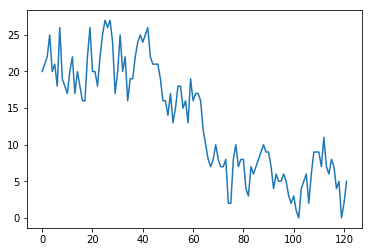

In [3]:
plot.plot(range(len(data)), data)

В данных прослеживается тренд. Скорее всего гипотезы о том, что данные - выборка скорее всего должны быть отвергнуты.

In [4]:
# Делаем кучу стандартных нормальных выборок чтобы посчитать по нм статистики

bootstrap_size = 1000
sample_size = len(data) # Длину выборок возмем такую же, как длина исходной
bootstrap = [
    stats.norm.rvs(size=sample_size) for j in range(bootstrap_size)
]

In [5]:
def vald_volfit_statistic(sample):
    mediana = numpy.percentile(sample, 50)
    n_0 = 0
    n_1 = 0
    N = 0
    state = None
    for value in sample:
        if value >= mediana:
            n_1 += 1
        else:
            n_0 += 1
        if state != (value >= mediana):
            N += 1
            state = (value >= mediana)
    
    return (
        (N - 1 - (2 * n_0 * n_1) / (n_0 + n_1)) / numpy.sqrt(
            (2 * n_0 * n_1 * (2 * n_0 * n_1 - n_0 - n_1)) / ((n_0 + n_1) ** 2 * (n_0 + n_1 - 1))
        )
    )

def inversion_statistic(sample):
    n = len(sample)
    I = 0
    for i in range(n):
        for j in range(i + 1, n):
            if sample[i] > sample[j]:
                I += 1
    E = n * (n - 1) / 4
    D = (2 * n ** 3 + 3 * n ** 2 - 5 * n) / 72
    return (I - E) / numpy.sqrt(D)

In [6]:
alpha = 0.05

In [7]:
# Считаем статистики и квантили. Распределние симметричное, поэтому используем двусторонний критерий.

vald_volfit_values = [vald_volfit_statistic(sample) for sample in bootstrap]
vald_volfit_values.sort()
vald_volfit_statistic_down_threshold = vald_volfit_values[int(len(vald_volfit_values) * alpha / 2)]
vald_volfit_statistic_up_threshold = vald_volfit_values[-int(len(vald_volfit_values) * alpha / 2)]

In [8]:
# Считаем статистики и квантили. Распределние симметричное, поэтому используем двусторонний критерий.

inversion_values = [inversion_statistic(sample) for sample in bootstrap]
inversion_values.sort()
inversion_statistic_down_threshold = inversion_values[int(len(inversion_values) * alpha / 2)]
inversion_statistic_up_threshold = inversion_values[-int(len(inversion_values) * alpha / 2)]

In [9]:
print("Vald Volfit down threshold: {}, Vald Volfit up threshold: {}".format(
    vald_volfit_statistic_down_threshold, vald_volfit_statistic_up_threshold
))
print("inversion down threshold: {}, inversion up threshold: {}".format(
    inversion_statistic_down_threshold, inversion_statistic_up_threshold
))
print("Vald Volfit statistic: {}, inversion statistic: {}".format(
    vald_volfit_statistic(data), inversion_statistic(data)
))

Vald Volfit down threshold: -2.000068304844541, Vald Volfit up threshold: 1.8182439134950374
inversion down threshold: -1.8743357504017393, inversion up threshold: 2.148736733931628
Vald Volfit statistic: -9.818517132873202, inversion statistic: 9.615098979333599


Оба критерий говорят, что гипотезу можно отвергнуть, чего мы и ожидали.